# NO SHOW DATASET ANALYSIS


### INTRODUCTION

*This Dataset contains data of over 100,000 patients in Brazil and whether they showed up for their Medical Apppointments or not. In addition to this, there exist several other data about each patient to help us identify if there are any trends*

**COLUMNS Include:**

 0   PatientId : Unique Identifier for each Patient     
 1   AppointmentID : Unique Identifier for each appointment   
 2   Gender: Are the Patients Male or Female?         
 3   ScheduledDay:      
 4   AppointmentDay  
 5   Age: How Old is patient ?              
 6   Neighbourhood: where the patient lives  
 7   Scholarship:  Is patient covered by some health finance plan  
 8   Hypertension: Does patient have underlying medical condition (Hypertension)   
 9   Diabetes :  Does patient have underlying medical condition (Diabetes)     
 10  Alcoholism : Does patient take Alcohol?     
 11  Handicap : Does Patient have any Bodily/Physical limitations?     
 12  SMS_received: Does patient receive sms reminders?   
 13  No-show: Did patient Show up or not?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### QUESTION: What Factors Inluence/ Can help us predict if Patients will show up for their Appointments or not?

### FURTHER QUESTIONS

a) How does age affect whether people show up for their appointments or not?

b) What fraction of the Total Dataset have more that one appoinment, what was the turn out like for thode with multiple appointments

c) How important are finances/ health cover as indicated in the scholarship column in determining if people will show up?

d) What category of people/ Is there any trend amongst those with scholarship benefits?

e) Do people from a certain Neighbourhood show up more frequently compared to others?

f) Are Underlying Health conditions such as Hypertension and Diabetes contributors to patients attending their appointments?

g) Is there a relationship between Alcoholism and underlying Health conditions as mentioned above?

h) How likely are people identified with Alcholism to show up for their Appointments

i) What population of the Total Dataset are Handicap?

j) Ratio of Handicap people who attend their appointments to ratio of handicap people who dont attend their appointments

k) Have sms reminders been helpful: what percentage of people who receive sms show up for their appointments


### ASSESSING THE NOSHOW DATASET

In [2]:
df_noshow = pd.read_csv('noshowappointments.csv')
df_noshow.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [6]:
def dataset_info(df):
    print(f'Number of rows in the dataset: {df.shape[0]}')
    print(f'Number of columns in the dataseta: {df.shape[1]}')
    print(f'Number of values in the dataset: {df.count().sum()}')
    print(f'Number missing values in the dataset: {sum(df.isna().sum())}')
    print(f'{df.dtypes}')

In [7]:
dataset_info(df_noshow)

Number of rows in the dataset: 110527
Number of columns in the dataseta: 14
Number of values in the dataset: 1547378
Number missing values in the dataset: 0
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


#### OBSERVATION 1: 
From the Info() output, we see that the data doesn't have missing values, However, some column names are wrongly spelt and we also have incorrect Datatypes

## CLEANING THE DATASET

### Rename Faulty Column Names

In [9]:
df_noshow.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'Noshow'}, inplace = True)

### Changing Column Data Types as Appropriate

In [10]:
df_noshow['PatientId'] = df_noshow['PatientId'].astype('int64')
df_noshow['ScheduledDay'] = df_noshow['ScheduledDay'].astype('datetime64')
df_noshow['AppointmentDay'] = df_noshow['AppointmentDay'].astype('datetime64')

### Checks to Confirm that changes made have been effected

In [11]:
dataset_info(df_noshow)

Number of rows in the dataset: 110527
Number of columns in the dataseta: 14
Number of values in the dataset: 1547378
Number missing values in the dataset: 0
PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
Noshow                    object
dtype: object


In [8]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## EXPLORING THE DATA

In [9]:
plt.rc('font', size=15)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20) 

In [12]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Observations

1.) Age: More than half of the population are 37 years and below.

2.) Scholarship: Only About 10% of the total population have access to Scholarship/health finance.

3.) Hypertension: About 20% of the total population are Hypertensive.

4.) Diabetes: About 7% of the total population are diabetic.

5.) Handicap: Only about 2% of the total population seem to have a disability.

6.) SMS_received: About 32% of the total population received sms.

### Probe 1: To find out what proportion of our dataset showed up/ didn't show up for their appointments?

,Noshow
No,79.806744
Yes,20.193256


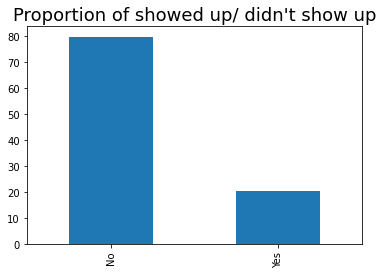

In [14]:
(df_noshow['Noshow'].value_counts()/len(df_noshow)*100).plot(kind='bar',figsize=(6,4));
plt.title('Proportion of showed up/ didn\'t show up',fontsize=18)
(df_noshow.Noshow.value_counts()/len(df_noshow)*100).to_frame()

#### Finding 1:                                       Ratio of Total Noshow dataset Population that showed up for their appointments to those who didnt is 4:1 as shown in the pie chart above, This means about 80% of the dataset population attend their appointments.

### Probe 2: Number of Unique patients

In [16]:
df_noshow['PatientId'].nunique()

62299

#### Finding 2:  From our results, we see that we have 62299 unique patient ids hence we have 62299 unique patients.

### Probe 3: Number of patients with Just one appointment.  

In [15]:
(df_noshow['PatientId'].value_counts() == 1).value_counts().to_frame()

,PatientId
True,37920
False,24379


#### Finding 3: Note for patients with more than 1 appointment, their PatientId will have more than 1 occurrence on the PatientId column.Out of the 62,299 Unique patients, 37,920 patients have just one appointment.

### Probe 4: Ratio of Female to Male population

,Gender
F,71840
M,38687


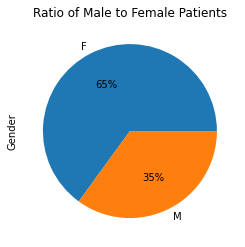

In [18]:
df_noshow['Gender'].value_counts().plot(kind='pie',autopct='%.0f%%', figsize=(6,4));
plt.title('Ratio of Male to Female Patients');
df_noshow.Gender.value_counts().to_frame()

####  Finding 4: Here we see that there are more women accessing healthcare than men, infact the no of women is almost twice the no of men

### Probe 5: What percentage of the population benefit from Health Financing (Scholarship)

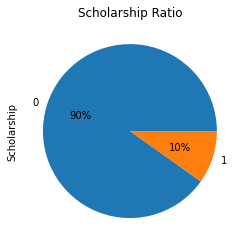

In [19]:
df_noshow['Scholarship'].value_counts().plot(kind='pie',autopct='%.0f%%', figsize=(6,4))
plt.title('Scholarship Ratio');

#####  Finding 5: The above piechart shows that only 10% of the Dataset Population had some form of health financing which is called scholarship in this dataset.

### Probe 6: What percentage of the population received SMS?

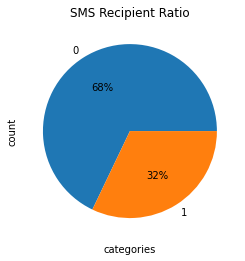

In [20]:
df_noshow['SMS_received'].value_counts().plot(kind='pie', autopct='%.0f%%',figsize = (6,4));
plt.title('SMS Recipient Ratio');
plt.xlabel('categories')
plt.ylabel('count');

#### Finding 6: As seen in the bar chart above, only a third of the dataset population receive Sms Messages to remind them of their appointment

##  Seperating the Noshow Data into Two Dataframes for Comparison Using the Noshow Column

In [21]:
Didnt_Showup = df_noshow['Noshow'] == 'Yes'
df_Didnt_Showup = df_noshow[Didnt_Showup]
df_Didnt_Showup.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes


In [22]:
Showed_up = df_noshow['Noshow'] == 'No'
df_Showed_up = df_noshow[Showed_up]
df_Showed_up.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Diving deeper into the data of those who didn't show up for their Appointments (df_Didn't _Showup)

In [23]:
df_Didnt_Showup.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Probe 7: Checking the Gender Disribution of those who didnt show up/attend their appointments.

In [26]:
df_Didnt_Showup.Gender.value_counts().to_frame()

,Gender
F,14594
M,7725


#### The population of females who didnt attend their appointment is still almost twice the population of men who didnt attend their appointments.

### Probe 8: Out of all the People who didn't show up, How Many were Handicapped?

In [22]:
(df_Didnt_Showup.Handicap.value_counts()/len(df_Didnt_Showup)*100).to_frame()

,Handicap
0,98.176442
1,1.639858
2,0.165778
3,0.013441
4,0.004480


#### Finding 8: About 2% of the population who didn't attend their appointments were handicapped.

### Probe 9: No of Individuals who Didnt show up for their appointments but  have underlying medical conditions: Hypertension , Diabetes ?

In [37]:
df_Didnt_Showup.query('Diabetes == 1 or Hypertension == 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
44,274164858852,5635414,F,2016-04-28 13:27:27,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
126,944758151797235,5633576,F,2016-04-28 09:37:22,2016-04-29,67,PRAIA DO SUÁ,0,0,1,0,0,0,Yes
212,426698361512188,5642059,M,2016-04-29 14:59:38,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,Yes
270,8617227766652,5620528,F,2016-04-26 09:08:53,2016-04-29,45,CARATOÍRA,1,1,0,0,0,1,Yes
272,5119615955892,5594085,F,2016-04-18 10:12:57,2016-04-29,51,NOVA PALESTINA,0,1,0,0,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110386,2957278645256,5582576,F,2016-04-14 09:37:34,2016-06-01,48,RESISTÊNCIA,0,1,0,0,0,1,Yes
110399,94371232592727,5692938,F,2016-05-12 16:47:53,2016-06-07,17,RESISTÊNCIA,0,1,0,0,0,1,Yes
110492,645634214296344,5786741,M,2016-06-08 08:50:19,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,85442954737999,5779046,F,2016-06-06 17:35:38,2016-06-08,37,MARIA ORTIZ,0,1,0,0,0,0,Yes


#### Observation 9: I had assumed that those with underlying illnesses will not miss their appointments, but as seen above, this is clearly not the case. We have 4061 persons in this situation.

### Probe 10: How Many people missed their appointments, from each neighbourhood?

In [35]:
df_N = df_noshow[['Neighbourhood','Noshow']]
df_N.head(2)

,Neighbourhood,Noshow
0,JARDIM DA PENHA,No
1,JARDIM DA PENHA,No


In [26]:
df_N.groupby('Neighbourhood').mean()

,Noshow
Neighbourhood,
AEROPORTO,0.875000
ANDORINHAS,0.769673
ANTÔNIO HONÓRIO,0.815498
ARIOVALDO FAVALESSA,0.780142
BARRO VERMELHO,0.784870
...,...
SÃO JOSÉ,0.783510
SÃO PEDRO,0.789624
TABUAZEIRO,0.817050


#### Finding 10: From the above table, its evident that people living in the Neighbourhoods to the Top of the table are more likely to miss their appointments compared to others, this could be a result of the distance of these neighbourhoods to the hospital.  

### Probe 11: No of Individuals who have scholarship and what neighbourhood they live in.

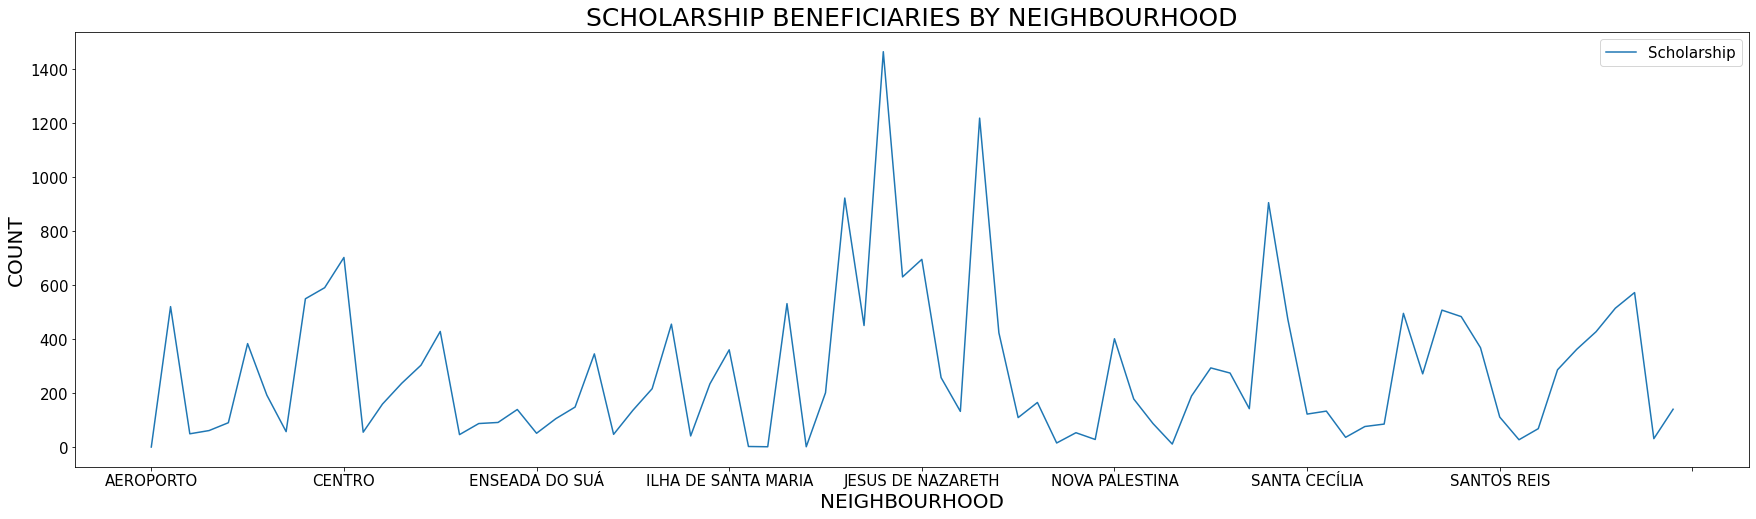

In [27]:
df_Neighbourhood= df_Didnt_Showup.groupby('Neighbourhood').count()['Scholarship'].to_frame().plot(kind= 'line', figsize=(30,8));
plt.title('SCHOLARSHIP BENEFICIARIES BY NEIGHBOURHOOD');
plt.xlabel('NEIGHBOURHOOD')
plt.ylabel('COUNT');

#### Finding 11: Some Neighbourhoods seem to have better access to Scholarship than others, although for Centro and Jesus de Nazareth Neighbourhoods, the scholarship doesn't seem to influence better attendance during their appointments as shown by the last graph and the table.

# CONCLUSION 

#### There were no sufficient insights drawn from this dataset to predict if a patient will show up for their appointments or not. No conclusive facts were generated from the relationship between the columns. 

#### The gender distribution for the total data population compared to the gender distribution of the population who didnt show up for their apointments is similar.

#### However from the data we see that every 4 out of 5 randomly selected patients are likely to show up for their appointments. 

#### The data is however insufficient to help us predict to what degree factors like underlying illnesses, gender and physical disability will prevent patients from showing up for their appointments

##### People from  these Neighbourhoods are less likely to show up.  JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA, CENTRO e.t.c as shown by the chart. 

#### Data on the distances of each Neighourhood from the health facility would have been helpful in determining if the challenge of people who didnt show up for their appointments was distance


# LIMITATION

#### We do no have enough information to help explain why people miss their appointments. Also the Handicap Column is quite confusing as I expected 0 and 1 (Boolean) values as found for example in the diabetes,Scholarship columns, However results show 0 to 4. There is also not enough documentation explaining the columns.
